# Final Python Assignment

Use the following table to provide us with

|name | student number|
|----|----|
|Simon Oudhoff| 1278559|
|other group member's name| student number|

# Read this carefully

This is the final assignment for python. You also need to make the R part of this final assignment. 

With this python part of the final assignment, you can earn 4 points.

This assignment needs to be uploaded June 13 (23:59 at the latest). You cannot use this assignment for the resit!

After you have finished this exam, do the following:

* upload your python and R files to github
* create two links in your README file:

    * one link to "final python assignment"
    * one link to "final R assignment"

* fill in the google form (see link on Blackboard) that you have uploaded your files
* use the same student number you gave us before, otherwise we cannot retrieve your pass/fail grades


# Bargaining model

In the python lectures we considered a two period bargaining model. In the assignment of week 5, we extended this to a three period model.

In this final assignment we are going to extend the model to $n$ periods, where $n$ is a variable.

Although in the lectures and assignments we worked with plotly to make graphs, here we will use [matplotlib](https://matplotlib.org/). Hence, you need to google to see how plots are made using this library. An important aspect of using open source software is that you can figure out yourself how to use (new) things.


# Import libraries

First, we need to import some libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [2]:
min_offer = 0.0
max_offer = 10.0
step = 0.1
offers = np.arange(min_offer,max_offer+0.1, 0.1)
offers

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ])

<i>When we work with np.arrange we are required to give minimum offer (min_offer) and maximum offer (max_offer). When giving the last number, it is important that the last number is excluded, that's why we add the +0.1 (the step size in this case). At last we need to give it the step size (step), which is 0.1.</i>

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the lecture:

In [3]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept

def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

<i>Just as in the lecture. We accept when the offer is bigger than or equal to the outside option (your_outside_option). When we are making an offer we are also looking at different options. We want if to tell us if we should make an offer or not (thats the first thing we get in the return(your_offer)). Secondly, we'll get the profit that we make (your_profit). At last we get the other's profit (other_profit).</i>

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [4]:
offer = {}

<i>Just as in the assignment of week 5.</i>

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [5]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]= make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1])
    return offer

<i>It gives us the offer with n periods and delta (δ) as discount factor.</i>

**5)** [0.5 point] Check the outcomes for the case where $\delta = 0.9$, $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [6]:
delta = 0.9
print(outcome(1,0.9))
print(outcome(2,0.9))
print(outcome(3,0.9))

{2: [0, 0, 0], 1: (0.0, 10.0, 0.0)}
{2: (0.0, 10.0, 0.0), 1: (9.0, 1.0, 9.0), 3: [0, 0, 0]}
{2: (9.0, 1.0, 9.0), 1: (0.90000000000000002, 9.0999999999999996, 0.90000000000000002), 3: (0.0, 10.0, 0.0), 4: [0, 0, 0]}


<i>This gives us the outcomes for n is 1, 2 and 3 with delta (δ) 0.9</i>

**6)** [1 point] *Using matplotlib* plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game $n$; on the vertical axis the payoff to player 1.

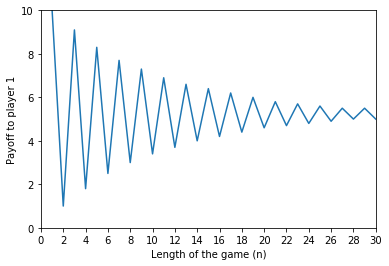

In [20]:
n=30
delta = 0.9
range_n = np.arange(1,n+1,1)

y=[]
for i in range_n:
    y.append(outcome(i,delta)[1][1])

plt.ylabel("Payoff to player 1")
plt.xlabel("Length of the game (n)")
plt.ylim(0.0,10.0)
plt.xlim(0,30)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
plt.plot(range_n,y)



<i>I labeled the y-axis "Payoff to player 1" with plt.ylabel and the x-axis "Length of the game (n)" with plt.xlabel. I gave it a range on the y-axis and the x-axis with plt.ylim and plt.xlim. I made it make steps of 2 on the x-axis with plt.xticks and then plotted the graph over the already defined range_n, which makes it start at 1, and y.</i>

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this? [hint: if you cannot plot the outcome with matplotlib, you can still answer this question; e.g. simply by looking at the outcomes for different values of $n$]

<i>In the graph you can see that the payoff to player 1 starts to deviate less from 5 as the game lasts for more rounds. This makes sense, since as you play more games, the chance that you'll get a high win or loss goes down.</i>

In [ ]:
<i>In the graph you can see that the payoff to player 1 starts to deviate less from 5 as the game lasts for more rounds. This makes sense, since as you play more games, the chance that you'll get a high win or loss goes down.</i>